In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.core.display  import HTML

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sb.set()

jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 1) IMPORTING DATA:

In [3]:
aep = pd.read_csv( 'AEP_hourly.csv')
comed = pd.read_csv( 'COMED_hourly.csv')
dayton = pd.read_csv( 'DAYTON_hourly.csv')
deok = pd.read_csv('DEOK_hourly.csv')
dom = pd.read_csv( 'DOM_hourly.csv')
duq = pd.read_csv( 'DUQ_hourly.csv')
ekpc = pd.read_csv( 'EKPC_hourly.csv')
fe = pd.read_csv( 'FE_hourly.csv')
ni = pd.read_csv( 'NI_hourly.csv')
pjm = pd.read_csv( 'PJM_Load_hourly.csv')
pjme = pd.read_csv( 'PJME_hourly.csv')
pjmw = pd.read_csv( 'PJMW_hourly.csv')

In [4]:
# COMBINE ALL DATASETS INTO ONE. 
# CREATING A COLUMN WHICH CAN IDENTIFY THE RESPECTIVE ELECTRIC COMPANIES

aep['electric_company'] = 'AEP'
comed['electric_company'] = 'COMED'
dayton['electric_company'] = 'DAYTON'
deok['electric_company'] = 'DEOK'
dom['electric_company'] = 'DOM'
duq['electric_company'] = 'DUQ'
ekpc['electric_company'] = 'EKPC'
fe['electric_company'] = 'FE'
ni['electric_company'] = 'NI'
pjm['electric_company'] = 'PJM'
pjme['electric_company'] = 'PJME'
pjmw['electric_company'] = 'PJMW'

In [5]:
# EACH REGION HAS DIFFERENT COLUMN NAME FOR ENERGY CONSUMPTION, SO CHANGE THEM INTO A COMMON NAME:

aep = aep.rename( columns={'AEP_MW': 'mw_energy_consumption'} )
comed = comed.rename( columns={'COMED_MW': 'mw_energy_consumption'} )
dayton = dayton.rename( columns={'DAYTON_MW': 'mw_energy_consumption'} )
deok = deok.rename( columns={'DEOK_MW': 'mw_energy_consumption'} )
dom = dom.rename( columns={'DOM_MW': 'mw_energy_consumption'} )
duq = duq.rename( columns={'DUQ_MW': 'mw_energy_consumption'} )
ekpc = ekpc.rename( columns={'EKPC_MW': 'mw_energy_consumption'} )
fe = fe.rename( columns={'FE_MW': 'mw_energy_consumption'} )
ni = ni.rename( columns={'NI_MW': 'mw_energy_consumption'} )
pjm = pjm.rename( columns={'PJM_Load_MW': 'mw_energy_consumption'} )
pjme = pjme.rename( columns={'PJME_MW': 'mw_energy_consumption'} )
pjmw = pjmw.rename( columns={'PJMW_MW': 'mw_energy_consumption'} )

In [6]:
# SHAPE OF THE DATASET OF EACH OF THE ELECTRIC COMPANY :

print("Shape of AEP electric company : ",aep.shape)
print("Shape of COMED electric company : ",comed.shape)
print("Shape of DAYTON electric company : ",dayton.shape)
print("Shape of DEOK electric company : ",deok.shape)
print("Shape of DOM electric company : ",dom.shape)
print("Shape of DUQ electric company : ",duq.shape)
print("Shape of EKPC electric company : ",ekpc.shape)
print("Shape of FE electric company : ",fe.shape)
print("Shape of NI electric company : ",ni.shape)
print("Shape of PJM electric company : ",pjm.shape)
print("Shape of PJME electric company : ",pjme.shape)
print("Shape of PJMW electric company : ",pjmw.shape)

Shape of AEP electric company :  (121273, 3)
Shape of COMED electric company :  (66497, 3)
Shape of DAYTON electric company :  (121275, 3)
Shape of DEOK electric company :  (57739, 3)
Shape of DOM electric company :  (116189, 3)
Shape of DUQ electric company :  (119068, 3)
Shape of EKPC electric company :  (45334, 3)
Shape of FE electric company :  (62874, 3)
Shape of NI electric company :  (58450, 3)
Shape of PJM electric company :  (32896, 3)
Shape of PJME electric company :  (145366, 3)
Shape of PJMW electric company :  (143206, 3)


In [7]:
df = pd.concat([aep,comed,dayton,deok,dom,duq,ekpc,fe,ni,pjm,pjme,pjmw])
df.sample(10)

,Datetime,mw_energy_consumption,electric_company
24199,2007-06-28 14:00:00,2899.0,DAYTON
20883,2007-04-15 08:00:00,8324.0,DOM
112806,2015-11-18 08:00:00,5497.0,PJMW
44605,2007-08-30 01:00:00,5411.0,PJMW
45880,2017-10-08 20:00:00,2978.0,DEOK
82452,2011-05-06 09:00:00,5306.0,PJMW
112336,2017-03-08 12:00:00,1523.0,DUQ
71671,2013-06-29 01:00:00,10295.0,DOM
14806,2003-04-23 02:00:00,22827.0,PJME
48989,2007-05-30 17:00:00,43540.0,PJME


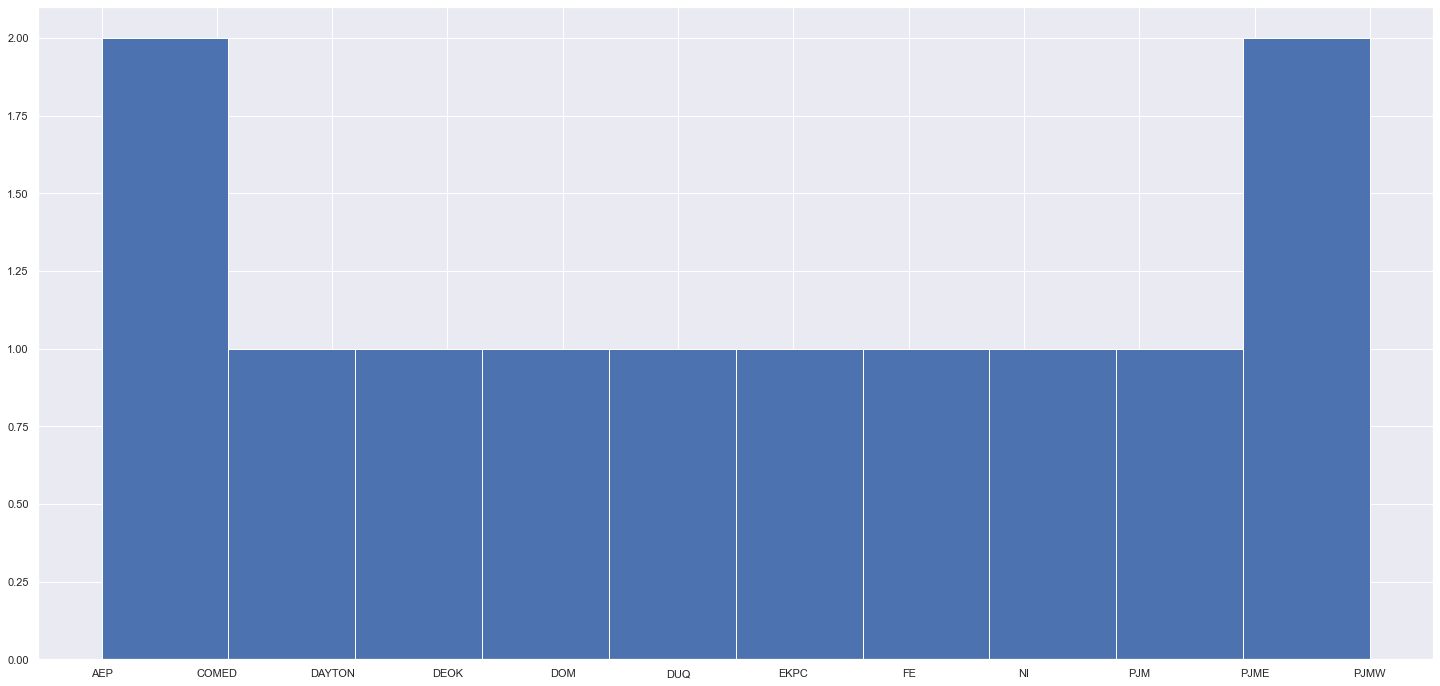

In [8]:
company = [i for i in df['electric_company'].unique()]
plt.hist(company)
plt.show()

In [9]:
# SHAPE OF THE DATASET

df.shape

(1090167, 3)

# 2. DATA VISUALIZATION :

In [10]:
# FIND THE RANGE OF DATES AVAILABLE FOR EACH ELECTRIC COMPANY :

df1 = df.copy()

In [11]:
# CHANGE Datetime column name to datetime

column_new = ['datetime', 'mw_energy_consumption','electric_company']

# RENAME :
df1.columns = column_new
df1.columns

Index(['datetime', 'mw_energy_consumption', 'electric_company'], dtype='object')

In [12]:
# DATA DIMENSIONS:

print("Number of rows : ",df1.shape[0])
print("Number of columns : ",df1.shape[1])

Number of rows :  1090167
Number of columns :  3


In [13]:
# DATATYPES : 
print("Before updating : ")
print(df1.dtypes)

# datetime column has object datatype. Let's change it into datetime format for processing the data.

df1['datetime'] = pd.to_datetime(df1['datetime'])

# DATATYPES : 
print("\nAfter updating : ")
print(df1.dtypes)

Before updating : 
datetime                  object
mw_energy_consumption    float64
electric_company          object
dtype: object

After updating : 
datetime                 datetime64[ns]
mw_energy_consumption           float64
electric_company                 object
dtype: object


In [14]:
# CHECK FOR NULL VALUES : 

df1.isnull().sum()

datetime                 0
mw_energy_consumption    0
electric_company         0
dtype: int64

In [15]:
df1['mw_energy_consumption'].describe()

count    1.090167e+06
mean     1.120959e+04
std      1.053440e+04
min      0.000000e+00
25%      2.455000e+03
50%      8.217000e+03
75%      1.466500e+04
max      6.200900e+04
Name: mw_energy_consumption, dtype: float64

<AxesSubplot:xlabel='mw_energy_consumption', ylabel='Count'>

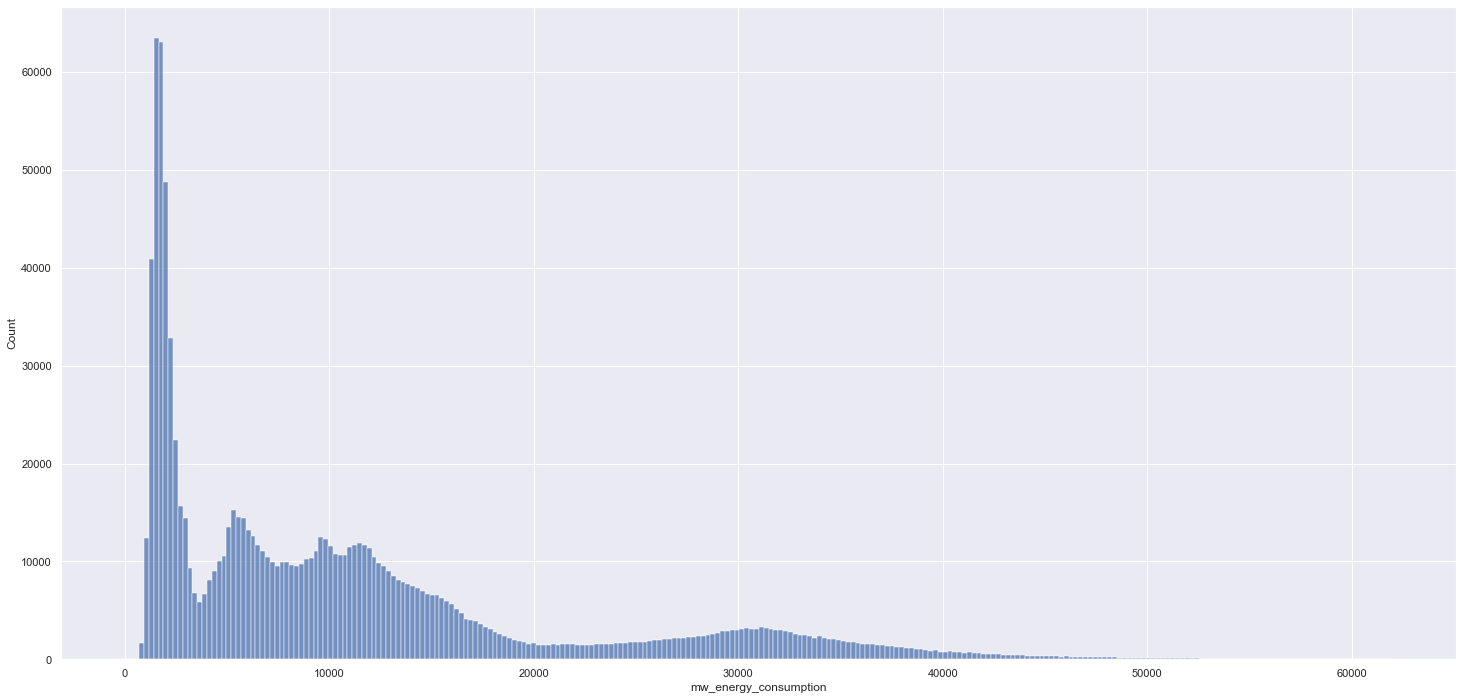

In [16]:
sb.histplot(df1['mw_energy_consumption'])

<AxesSubplot:xlabel='electric_company', ylabel='mw_energy_consumption'>

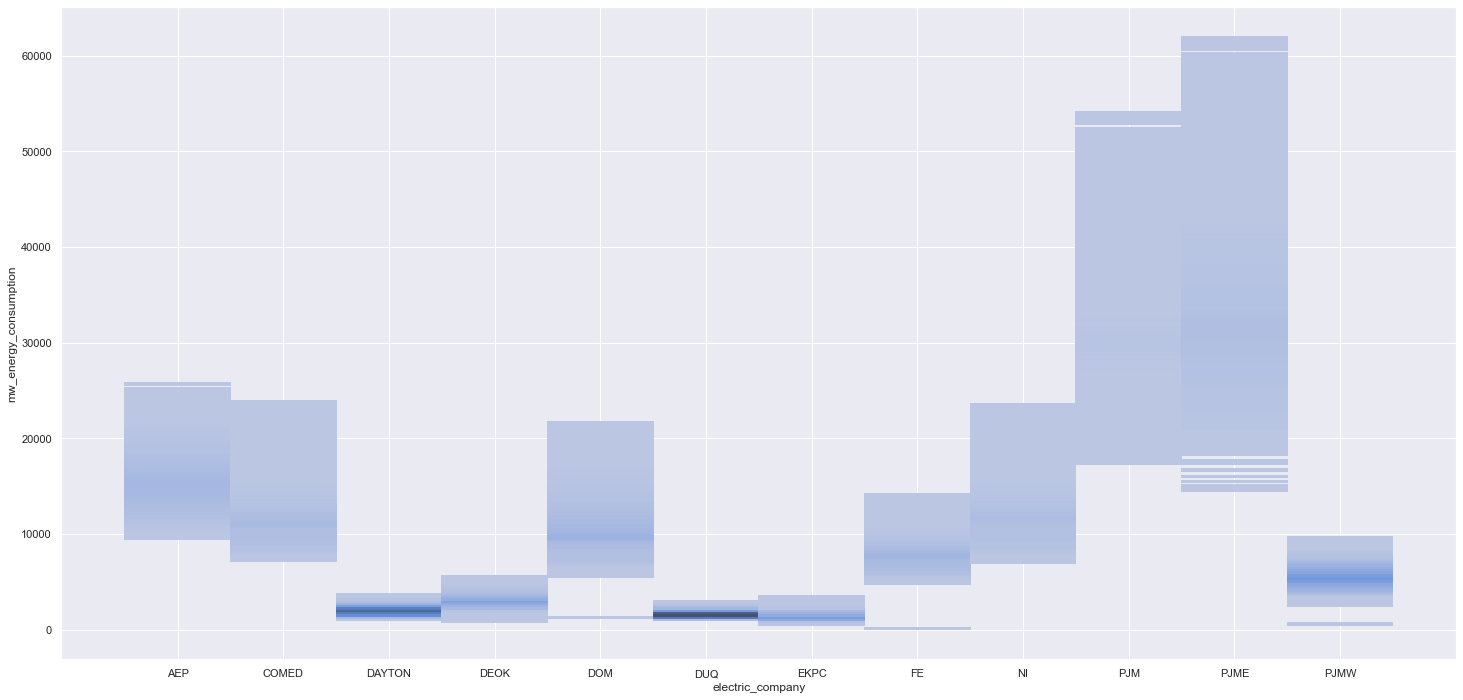

In [17]:
# BOX PLOT OF ENERGY CONSUMPTIONS OF ELECTRIC COMPANIES : 

sb.histplot(x = 'electric_company', y = 'mw_energy_consumption', data = df1)

<AxesSubplot:xlabel='electric_company', ylabel='mw_energy_consumption'>

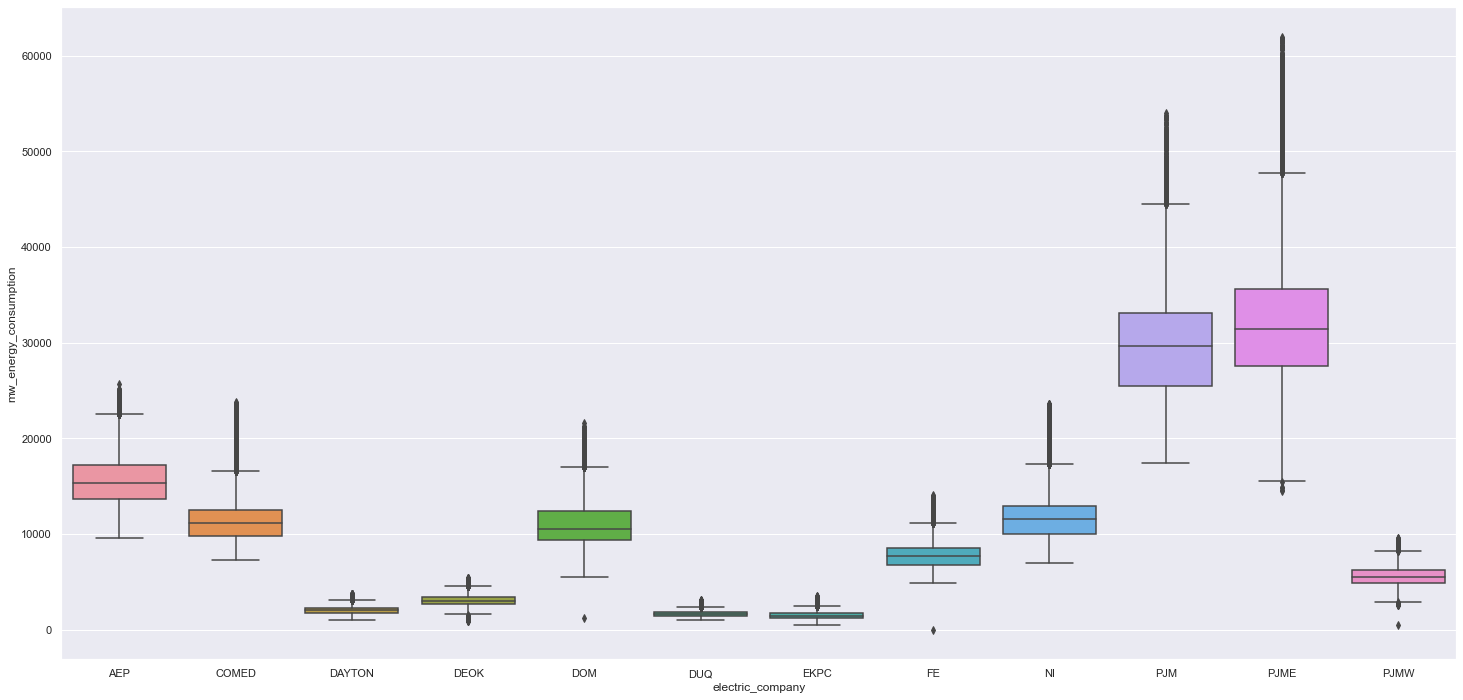

In [18]:
sb.boxplot(x = 'electric_company', y = 'mw_energy_consumption', data = df1)

In [28]:
df2 = df1.copy()

#DATE
df2['date'] = df2['datetime'].dt.date
df2['date'] = pd.to_datetime(df2['date'])

#YEAR
df2['year'] = df2['datetime'].dt.year

#MONTH
df2['month'] = df2['datetime'].dt.month

#HOUR OF DAY
df2['hour_of_day'] = df2['datetime'].dt.hour

#SEASON
# season:

# - Winter -> December (12), January (01) and February (02);
# - Spring -> March (03), April (04) and May (05);
# - Summer -> Jun (06), July (07) and August (08);
# - Autumn -> September (09), October (10) and November (11).

df2['season'] = df2['datetime'].apply( lambda x: 'Winter' if x.month == 12 or x.month == 1 or x.month == 2 else 'Spring' if  x.month == 3 or x.month == 4 or x.month == 5 else 'Summer' if  x.month == 6 or x.month == 7 or x.month == 8 else 'Autumn' if  x.month == 9 or x.month == 10 or x.month == 11 else '')

#DAY OF WEEK
## day_of_week:

# 0 - Monday
# 1 - Tuesday
# 2 - Wednesday
# 3 - Thursday
# 4 - Friday
# 5 - Saturday
# 6 - Sunday

df2['day_of_week'] = df2['datetime'].dt.weekday

#HOLIDAYS
#df2['holidays'] = df2['datetime'].apply(lambda x: 'Holiday' if x in holidays.US() else 'Holiday' if x+datetime.timedelta(days=1) in holidays.US() else 'Normal day' )

df2.head()

,datetime,mw_energy_consumption,electric_company,date,year,month,hour_of_day,season,day_of_week
0,2004-12-31 01:00:00,13478.0,AEP,2004-12-31,2004,12,1,Winter,4
1,2004-12-31 02:00:00,12865.0,AEP,2004-12-31,2004,12,2,Winter,4
2,2004-12-31 03:00:00,12577.0,AEP,2004-12-31,2004,12,3,Winter,4
3,2004-12-31 04:00:00,12517.0,AEP,2004-12-31,2004,12,4,Winter,4
4,2004-12-31 05:00:00,12670.0,AEP,2004-12-31,2004,12,5,Winter,4


In [29]:
df2.dtypes

datetime                 datetime64[ns]
mw_energy_consumption           float64
electric_company                 object
date                             object
year                              int64
month                             int64
hour_of_day                       int64
season                           object
day_of_week                       int64
dtype: object

In [ ]:
num_attributes = df2.select_dtypes(include = ["int64","float64"])
cat_attributes = df2.select_dtypes(exclude = ["int64","float64","datetime64[ns]"])
